### HEO Model : 1 Battery-1 Genset. 
=========================================================================================================================
$ 
\\
$

$ 
\\
$

### Optimization parameters.


$ Q_{\mathrm{max}} \hspace{1cm}$ : Maximal energy charge stored in battery (kWh)



$ Q_{\mathrm{init}} \hspace{1.1cm}$ : Initial energy charge stored on battery (kWh)



$ Q_{\mathrm{final}} \hspace{0.9cm}$ :  Final charge stored on battery (kWh)



$ P_{\mathrm{max}\;} \hspace{1cm}$ : Maximal power available from genset (kW)



${FC}_{max} \hspace{0.7cm}$ : Maximal fuel consumption (g/h)



$ {FC}_{offset} \hspace{0.4cm}$ : Offset for fuel consumption model at P=0)



$ a \hspace{1.7cm}$ : Slope in fuel consumption model



$ b \hspace{1.7cm}$ : Intercept in fuel consumption model (=)



$ K_{\mathrm{start}} \hspace{1cm}$ : Additional fuel consumption when starting genset (kg)



$ \Delta t \hspace{1.5cm}$ : Time step in discretization (h)




$ t_{\mathrm{max}\;} \hspace{1.1cm}$ : Max time in simulation (h)



$ n \hspace{1.7cm}$ :  Number of time steps in simulation



$ t_{\mathrm{max}\;} \hspace{1.1cm}$ : Max time in simulation (h)



$ t \hspace{1.8cm}$ :  Time vector in simulation (dim(t)=n)



$ \eta^{\mathrm{toBat}} \; \hspace{0.9cm}$ :  Efficiency when charging battery



$ \eta^{\mathrm{fromBat}} \; \hspace{0.5cm}$ :   Efficiency when battery is used for load



$ L \hspace{1.6cm}$ : Vector of pre-defined load profile (must be of same length as time vector, dim(L)=dim(t)=n) (kW)

$\newline$ 


### Optimization model.

$\mathrm{minimize}\;\;\;\;\;\sum_{k=1}^n {FC}_{k\;} \cdot \frac{\Delta t}{1000}+K_{\mathrm{start}} \sum_{k=2}^n z_k$  

$\newline$ 

Fuel consumption model 1 (linear):     $\hspace{1cm} {FC}_{k\;} ={aP}_{k\;} +b-{FC}_{offset} \cdot \left(1-y_k \right)\hspace{3cm}$      $k=1,\dots ,n$

Load requirements:     $\hspace{3.5cm}L_k =P_k^{\mathrm{load}} +\eta {\;}^{\mathrm{fromBat}} {\cdot \;P}_k^{\mathrm{fromBat}}\hspace{4.2cm}$      $k=1,\dots ,n$  


Power split:   $\hspace{4.8cm}P_{k\;} =P_k^{\mathrm{load}} {+\;P}_k^{\mathrm{toBat}}\hspace{6.3cm}$   $k=1,\dots ,n$

Charge balance (initial):   $\hspace{2.8cm}Q_0 =Q_{\mathrm{init}}\hspace{6.3cm}$  

Charge balance:  $\hspace{4cm}Q_k =Q_{k-1} +\eta^{\mathrm{toBat}} \cdot \;P_k^{\mathrm{toBat}} \Delta t-\;P_k^{\mathrm{fromBat}} \Delta t\hspace{1.8cm}$     $k=1,\dots ,n$ 


Charge balance (final):     $\hspace{3cm}Q_n =Q_{\mathrm{final}}\hspace{3cm}$   


Logical conditions on genset: $\hspace{2cm}P_{k\;} \le {0\ldotp 9P}_{\mathrm{max}\;} {\cdot y}_k\hspace{6.7cm}$    $k=1,\dots ,n$ 


(0 or in 0.2P_max - 0.9Pmax):  $\hspace{1.8cm}P_{k\;} \le {0\ldotp 2P}_{\mathrm{max}\;} {\cdot y}_k\hspace{6.8cm}$    $k=1,\dots ,n$




Logical conditions on battery:   $\hspace{1.9cm}y_k^{\mathrm{toBat}} +y_{k\;}^{\mathrm{fromBat}} \le 1\hspace{6.4cm}$     $k=1,\dots ,n$  $ \\$     
$\hspace{6.9cm}P_k^{\mathrm{toBat}} \le 0\ldotp 9P_{\mathrm{max}} {\cdot y}_k^{\mathrm{toBat}}\hspace{5.7cm}$ $k=1,\dots ,n$ 


$\hspace{6.9cm}P_k^{\mathrm{fromBat}} \le 0\ldotp 9P_{\mathrm{max}} {\cdot \;y}_k^{\mathrm{fromBat}}\hspace{4.8cm}$  $k=1,\dots ,n$ 

$\newline$ 


Constraints for linearization of objective:  $\hspace{0.5cm}z_k \ge y_k -y_{k-1}\hspace{7.0cm}$ $k=2,\ldotp \ldotp \ldotp ,n$

$\newline$ 

Variable bounds:  $\hspace{4.1cm}0\ldotp 2Q_{\mathrm{max}} \le Q_k \le Q_{\mathrm{max}}\hspace{5.8cm}$ $k=0,\ldotp \ldotp \ldotp ,n$  $ \\$  
$\hspace{7cm}0\le P_k \le 0\ldotp 9P_{\mathrm{max}}\hspace{6.5cm}$  $k=1,\ldotp \ldotp \ldotp ,n$    
 
$\hspace{7cm}0\le P_k^{\mathrm{toBat}} ,P_k^{\mathrm{fromBat}} \le {0\ldotp 9P}_{\mathrm{max}}\hspace{4.3cm}$ $k=1,\ldotp \ldotp \ldotp ,n$ 


$\hspace{7cm}0\le z_k \le 1\hspace{7.8cm}$  $k=2,\ldotp \ldotp \ldotp ,n$


$ \\$ Variable types:     $\hspace{1cm}Q_{k\}\,P_k^{\mathrm{toBat}}} ,P_k^{\mathrm{fromBat}} ,z_k$ :Continuous $\hspace{1cm}P_{k\}}$  :Semi-continuous  $\hspace{1.5cm}y_k ,y_k^{\mathrm{toBat}} ,y_k^{\mathrm{fromBat}}$ :Binary

$\newline$ 

 $ \\$ $P_k \hspace{2.1cm} $:  Power from genset during time step k
 
 $ \\$ $P_k^{\mathrm{toBat}}\hspace{1.5cm}$: Power to charge battery during time step k
 
 $ \\$ $P_k^{\mathrm{fromBat}}\hspace{1.2cm}$: Power delivered from battery during time step k
 
 $ \\$ $Q_k\hspace{2.1cm}$: Energy charge on battery at the end of time step k
 
 $ \\$ $y_k\hspace{2.1cm}$: Variable equal to 1 if genset is used in time step k, variable equal to 0 if genset not used in time step k

$ \\$ $y_k^{\mathrm{toBat}}\hspace{1.6cm}$: Variable equal to 1 if battery is charged under time step k

$ \\$ $y_k^{\mathrm{fromBat}}\hspace{1.1cm}$: Variable equal to 1 if battery if used for load in time step k

$ \\$ $z_k\hspace{1.9cm}$: Variable used to linearize additional cost when starting genset (  )



$\newline $
$\newline $




$\newline $
### Importing modules.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
from gurobipy import *
from src.functions.fuel_consumption import fuelCon
from src.functions.load_window import lwd 

### Python environment.

In [2]:
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.15 (main, Nov 24 2022, 14:39:17) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=9, micro=15, releaselevel='final', serial=0)


$\newline $
### Introducing problem Parameters.

In [3]:
Q_max = 250                                                   # maximal capacity stored on battery.
Q_0 = 0.5*Q_max                                               # inital capacity stored on battery.
Q_final = 0.5*Q_max                                           # Final capacity stored on the battery. 
eff_to_bat = 0.98                                             # battery charging efficiency.
eff_from_bat = 0.98                                           # battery transfer efficiency. 
P_A_max = 1000                                                # max output from gen set A.
dt = 1                                                        # simulation time step dt.
t_max = 60                                                    # time span for simulation = t_max hours.
t = np.atleast_2d(np.arange(0,t_max,dt)).T.conj()             # time scale in hours.
n = len(t)                                                    # number of time steps.
m = 1                                                         # number of Gensets used on the trip.
fc_j_offset = 12060                                           # genset j fuel consumption when no power gnerated (p=0) in g/h.
K_j_start = 0.0                                               # Addicitional starting cost.
V_steps = [x for x in range (0,n)]                            # Time steps vector. 
V_steps_z = V_steps[:-1]                                      # Time steps vector without the final step. 


L = lwd (200,200,10,                                          # Power requirement window.
                400,400,10,
                600,600,10,
                600,200,30,
                0,10,20,30
                )                                             # Pre-defined load porfile requirements framed in 60 time steps

$\newline $
### Creating the problem variable. 

In [4]:
Optim = LpProblem('Energy_Opt',LpMinimize)

$\newline $
### Slope, intercept and maximum fuel bound calculation.

In [5]:
a_j = (fuelCon(0.9*P_A_max, P_A_max) - fuelCon(0.2*P_A_max, P_A_max)) /(0.7*P_A_max) #slope.
b_j = fuelCon(0.2*P_A_max, P_A_max) - a_j*0.2*P_A_max #Intercept.
maxFC = fuelCon(0.9*P_A_max,P_A_max) # Max fuel bound.
print('FC Linear model caracteristics')
print('-----------------------------')
print('Slope =', a_j)
print('Intercept =', b_j)

FC Linear model caracteristics
-----------------------------
Slope = 186.3
Intercept = 12059.999999999993


$\newline $
### Setting-up decision Variables.

In [6]:
Q_bat = LpVariable.dicts("Q_bat", V_steps, lowBound=0.2*Q_max, upBound=Q_max, cat = LpContinuous)  # Battery charge at time step k.
P_From_bat = LpVariable.dicts("P_From_bat", V_steps, lowBound=0, upBound=0.9*P_A_max, cat = LpContinuous) # Power transfered from the battery to the load.
P_A = LpVariable.dicts("P_A", V_steps, lowBound=0, upBound=0.9*P_A_max, cat = LpContinuous)  # Power generated by the Genset A.
P_A_load = LpVariable.dicts("P_A_load", V_steps, lowBound=0, upBound=0.9*P_A_max, cat= LpContinuous) # Power transfered from the Genset A to the load at time step k.
Z =  LpVariable.dicts("Z", V_steps_z, lowBound=0, upBound=1, cat = LpInteger) # Aditional cost fuel oil consumption when starting Genset j.
FC_A = LpVariable.dicts("FC_A", V_steps, lowBound=0, upBound= maxFC, cat = LpContinuous) # Specific fuel oil consumption.
P_A_to_bat =  LpVariable.dicts("P_A_to_bat", V_steps, lowBound=0, upBound=0.9*P_A_max, cat = LpContinuous) 
Y_to_bat = LpVariable.dicts("Y_to_bat", V_steps, lowBound=0, upBound=1, cat = LpInteger) # Genset selecter to charge the battery at time step k. 
Y_from_bat = LpVariable.dicts("Y_from_bat", V_steps, lowBound=0, upBound=1, cat = LpInteger) # Battery selecter to transfert to the Genset j st time step k.
Y = LpVariable.dicts("Y", V_steps, lowBound=0, upBound=1, cat = LpInteger) # Genset selecter : work ==> Y=1, Not work ==> Y=0.

$\newline $
### Setting-up the objective function.

In [8]:
FC = sum(FC_A[k] for k in V_steps) * dt/1000  # sum of the fuel oil comsumption for all gensets over all k steps.
L_added_cost = sum(Z[i] for i in V_steps_z) * K_j_start  # Sum of all of the additional costs including starting costs. 
Optim += lpSum (FC + L_added_cost), "objective function minimization fuel oil consumption" 
print(FC)

0.001*FC_A_0 + 0.001*FC_A_1 + 0.001*FC_A_10 + 0.001*FC_A_11 + 0.001*FC_A_12 + 0.001*FC_A_13 + 0.001*FC_A_14 + 0.001*FC_A_15 + 0.001*FC_A_16 + 0.001*FC_A_17 + 0.001*FC_A_18 + 0.001*FC_A_19 + 0.001*FC_A_2 + 0.001*FC_A_20 + 0.001*FC_A_21 + 0.001*FC_A_22 + 0.001*FC_A_23 + 0.001*FC_A_24 + 0.001*FC_A_25 + 0.001*FC_A_26 + 0.001*FC_A_27 + 0.001*FC_A_28 + 0.001*FC_A_29 + 0.001*FC_A_3 + 0.001*FC_A_30 + 0.001*FC_A_31 + 0.001*FC_A_32 + 0.001*FC_A_33 + 0.001*FC_A_34 + 0.001*FC_A_35 + 0.001*FC_A_36 + 0.001*FC_A_37 + 0.001*FC_A_38 + 0.001*FC_A_39 + 0.001*FC_A_4 + 0.001*FC_A_40 + 0.001*FC_A_41 + 0.001*FC_A_42 + 0.001*FC_A_43 + 0.001*FC_A_44 + 0.001*FC_A_45 + 0.001*FC_A_46 + 0.001*FC_A_47 + 0.001*FC_A_48 + 0.001*FC_A_49 + 0.001*FC_A_5 + 0.001*FC_A_50 + 0.001*FC_A_51 + 0.001*FC_A_52 + 0.001*FC_A_53 + 0.001*FC_A_54 + 0.001*FC_A_55 + 0.001*FC_A_56 + 0.001*FC_A_57 + 0.001*FC_A_58 + 0.001*FC_A_59 + 0.001*FC_A_6 + 0.001*FC_A_7 + 0.001*FC_A_8 + 0.001*FC_A_9


c:\Users\ahmmab2\.conda\envs\HYH_model\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


$\newline $
$\newline $
### Setting-up problem constraints.

In [9]:

for k in V_steps:

  # Fuel oil consumption constraint.
  Optim += FC_A[k] == P_A[k]*a_j + b_j - fc_j_offset*(1-Y[k])     

  # Load requirements constraints
  Optim += P_A_load[k] + eff_from_bat*P_From_bat[k] == L[k]       
  Optim += P_A_load[k] + P_A_to_bat[k] == P_A[k]                  


  # Genset logical constraints.
  Optim += P_A[k]  <= 0.9 * P_A_max * Y[k]
  Optim += P_A[k]  >= 0.2 * P_A_max * Y[k]
  Optim += Y[k]  >= 0
  Optim += Y[k]  <= 1
    
  # Battery charging logical constraints.
  Optim += P_A_to_bat[k] <= 0.9 * P_A_max * Y_to_bat[k]
  Optim += P_From_bat[k] <= 0.9 * P_A_max * Y_from_bat[k]
  Optim += Y_to_bat[k] + Y_from_bat[k]  <= 1
  

  # Charge balance logical constraints.
  if k == V_steps[0] :                                            
    Optim += Q_bat[k] == Q_0 + eff_to_bat*P_A_to_bat[k]*dt - P_From_bat[k]*dt


  else :  
    Optim += Q_bat[k] == Q_bat[k-1] + eff_to_bat*P_A_to_bat[k]*dt - P_From_bat[k]*dt

    
# Additional starting costs constraint.
for k in range(V_steps[0], V_steps[-1]): 
  Optim += Z[k] >= Y[k + 1] - Y[k] 
  
# Charge balance at the Final time step.
Optim += Q_bat[V_steps[-1]] == Q_final

$\newline $
$\newline $
### Solving the problem.

In [10]:
status = Optim.solve(GUROBI())

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i3-4000M CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 720 rows, 599 columns and 1617 nonzeros
Model fingerprint: 0x08cb5fcb
Variable types: 360 continuous, 239 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e-03, 1e-03]
  Bounds range     [1e+00, 2e+05]
  RHS range        [7e-12, 6e+02]
Presolve removed 546 rows and 375 columns
Presolve time: 0.01s
Presolved: 174 rows, 224 columns, 473 nonzeros
Variable types: 166 continuous, 58 integer (58 binary)
Found heuristic solution: objective 5194.8000000

Root relaxation: cutoff, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

$\newline $
$\newline $
### Printing optimization status.

In [11]:
LpStatus[status]

'Optimal'

$\newline $
$\newline $
### Printing constraints per each time step.

In [12]:
print(Optim.variables)

<bound method LpProblem.variables of Energy_Opt:
MINIMIZE
0.001*FC_A_0 + 0.001*FC_A_1 + 0.001*FC_A_10 + 0.001*FC_A_11 + 0.001*FC_A_12 + 0.001*FC_A_13 + 0.001*FC_A_14 + 0.001*FC_A_15 + 0.001*FC_A_16 + 0.001*FC_A_17 + 0.001*FC_A_18 + 0.001*FC_A_19 + 0.001*FC_A_2 + 0.001*FC_A_20 + 0.001*FC_A_21 + 0.001*FC_A_22 + 0.001*FC_A_23 + 0.001*FC_A_24 + 0.001*FC_A_25 + 0.001*FC_A_26 + 0.001*FC_A_27 + 0.001*FC_A_28 + 0.001*FC_A_29 + 0.001*FC_A_3 + 0.001*FC_A_30 + 0.001*FC_A_31 + 0.001*FC_A_32 + 0.001*FC_A_33 + 0.001*FC_A_34 + 0.001*FC_A_35 + 0.001*FC_A_36 + 0.001*FC_A_37 + 0.001*FC_A_38 + 0.001*FC_A_39 + 0.001*FC_A_4 + 0.001*FC_A_40 + 0.001*FC_A_41 + 0.001*FC_A_42 + 0.001*FC_A_43 + 0.001*FC_A_44 + 0.001*FC_A_45 + 0.001*FC_A_46 + 0.001*FC_A_47 + 0.001*FC_A_48 + 0.001*FC_A_49 + 0.001*FC_A_5 + 0.001*FC_A_50 + 0.001*FC_A_51 + 0.001*FC_A_52 + 0.001*FC_A_53 + 0.001*FC_A_54 + 0.001*FC_A_55 + 0.001*FC_A_56 + 0.001*FC_A_57 + 0.001*FC_A_58 + 0.001*FC_A_59 + 0.001*FC_A_6 + 0.001*FC_A_7 + 0.001*FC_A_8 + 0.001*F

In [13]:
for v in Optim.variables():
    print(v.name, "=", v.varValue )

FC_A_0 = 49319.99994501809
FC_A_1 = 49319.99999999999
FC_A_10 = 86580.00010778653
FC_A_11 = 86580.0
FC_A_12 = 86580.0
FC_A_13 = 86580.0
FC_A_14 = 86580.0
FC_A_15 = 86580.0
FC_A_16 = 86580.0
FC_A_17 = 86580.0
FC_A_18 = 86580.0
FC_A_19 = 86580.0
FC_A_2 = 49319.99999999999
FC_A_20 = 123840.0
FC_A_21 = 123840.0
FC_A_22 = 123840.0
FC_A_23 = 123840.0
FC_A_24 = 123840.0
FC_A_25 = 123840.0
FC_A_26 = 123840.0
FC_A_27 = 123840.0
FC_A_28 = 123840.0
FC_A_29 = 123840.0
FC_A_3 = 49319.99999999999
FC_A_30 = 123840.0
FC_A_31 = 121270.3448275862
FC_A_32 = 118700.6896551724
FC_A_33 = 116131.03448275864
FC_A_34 = 113561.37931034481
FC_A_35 = 110991.72413793104
FC_A_36 = 108422.06896551725
FC_A_37 = 105852.41379310345
FC_A_38 = 103282.75862068965
FC_A_39 = 100713.10344827586
FC_A_4 = 49319.99999999999
FC_A_40 = 98143.44827586206
FC_A_41 = 95573.79310344826
FC_A_42 = 93004.1379310345
FC_A_43 = 90434.4827586207
FC_A_44 = 87864.8275862069
FC_A_45 = 85295.1724137931
FC_A_46 = 82725.5172413793
FC_A_47 = 80155.

$\newline $
$\newline $
### Calculating the optimized fuel comsumption.

In [14]:
print("Total saved fuel comsumption of the trip:", value(Optim.objective),'kg') 

Total saved fuel comsumption of the trip: 5194.7999999955555 kg


$\newline $
### Pre-processing visualisation data.

In [15]:
# Constructing list out of the P_A vector.

P_A_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_A_'+ str(i)):
      P_A_list.append(v.varValue)
print(P_A_list)

# Constructing list out of the P_A_load vector.

P_A_load_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_A_load_'+ str(i)):
      P_A_load_list.append(v.varValue)
print(P_A_load_list)

# Constructing list out of the P_A_to_bat vector.

P_A_to_bat_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_A_to_bat_'+ str(i)):
      P_A_to_bat_list.append(v.varValue)
print(P_A_to_bat_list)

# Constructing list out of the P_From_bat.

P_From_bat_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('P_From_bat_'+ str(i)):
      P_From_bat_list.append(v.varValue)
print(P_From_bat_list)

# Constructing list out of the Q_bat vector.

Q_bat_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('Q_bat_'+ str(i)):
      Q_bat_list.append(v.varValue)
print(Q_bat_list)

# constructing list out of the FC_A vector.

FC_A_list = []
for v in Optim.variables():
  for i in V_steps:
    if v.name == ('FC_A_'+ str(i)):
      FC_A_list.append(v.varValue/1000)
print(FC_A_list)

# Constructing list out of load profil vector.

d_load_list = []              
for i in V_steps:
    d_load_list.append(L[i])
print(d_load_list)



[199.99999970487437, 200.0, 400.00000057856425, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 200.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 200.0, 600.0, 586.2068965517242, 572.4137931034483, 558.6206896551724, 544.8275862068965, 531.0344827586207, 517.2413793103449, 503.44827586206895, 489.65517241379314, 475.86206896551727, 200.0, 462.0689655172414, 448.2758620689655, 434.48275862068965, 420.68965517241384, 406.8965517241379, 393.1034482758621, 379.3103448275862, 365.51724137931035, 351.72413793103453, 337.93103448275866, 200.0, 324.1379310344828, 310.3448275862069, 296.55172413793105, 282.7586206896552, 268.9655172413793, 255.1724137931035, 241.37931034482762, 227.58620689655174, 213.79310344827587, 199.9999996927055, 200.0, 200.0, 200.0, 200.0]
[200.0, 200.0, 400.00000057856425, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 200.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 200.0, 600.0, 586.

$\newline $

### Load requirement window. 

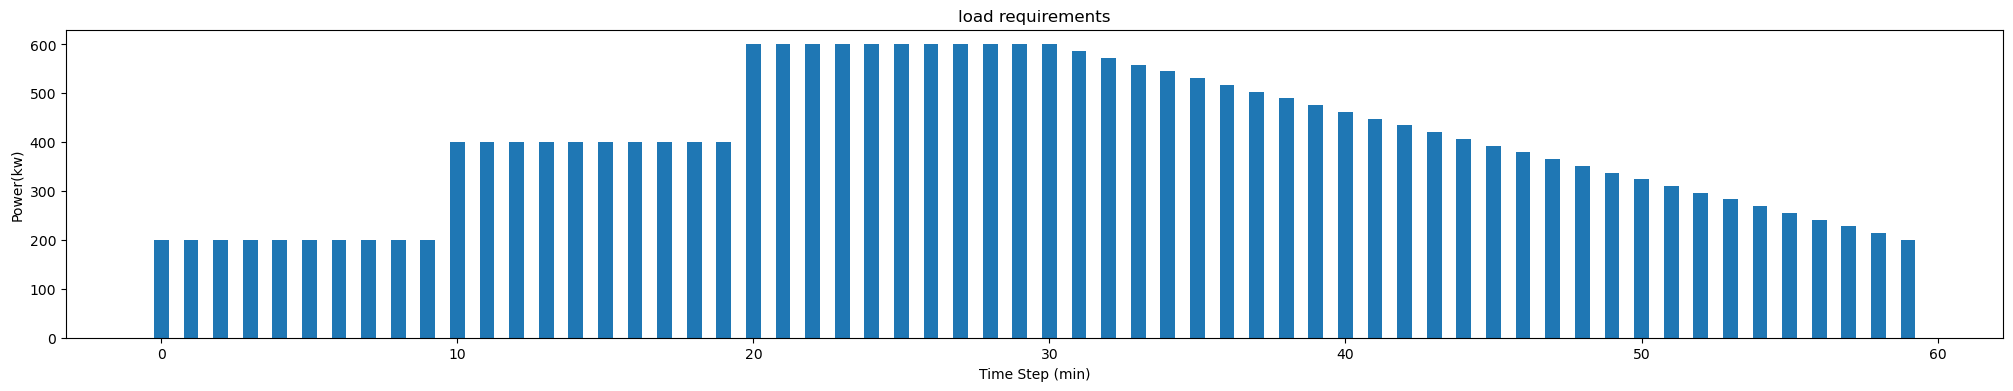

In [16]:
plt.rcParams["figure.figsize"] =  (25,4)
plt.bar(V_steps,d_load_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('Power(kw)')
plt.title('load requirements')
plt.show()

In [25]:
print(V_steps,L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] {0: 200.0, 1: 200.0, 2: 200.0, 3: 200.0, 4: 200.0, 5: 200.0, 6: 200.0, 7: 200.0, 8: 200.0, 9: 200.0, 10: 400.0, 11: 400.0, 12: 400.0, 13: 400.0, 14: 400.0, 15: 400.0, 16: 400.0, 17: 400.0, 18: 400.0, 19: 400.0, 20: 600.0, 21: 600.0, 22: 600.0, 23: 600.0, 24: 600.0, 25: 600.0, 26: 600.0, 27: 600.0, 28: 600.0, 29: 600.0, 30: 600.0, 31: 586.2068965517242, 32: 572.4137931034483, 33: 558.6206896551724, 34: 544.8275862068965, 35: 531.0344827586207, 36: 517.2413793103449, 37: 503.44827586206895, 38: 489.65517241379314, 39: 475.86206896551727, 40: 462.0689655172414, 41: 448.2758620689655, 42: 434.48275862068965, 43: 420.68965517241384, 44: 406.8965517241379, 45: 393.1034482758621, 46: 379.3103448275862, 47: 365.51724137931035, 48: 351.72413793103453, 49: 337.93103448

$\newline $
### Generated genset power.

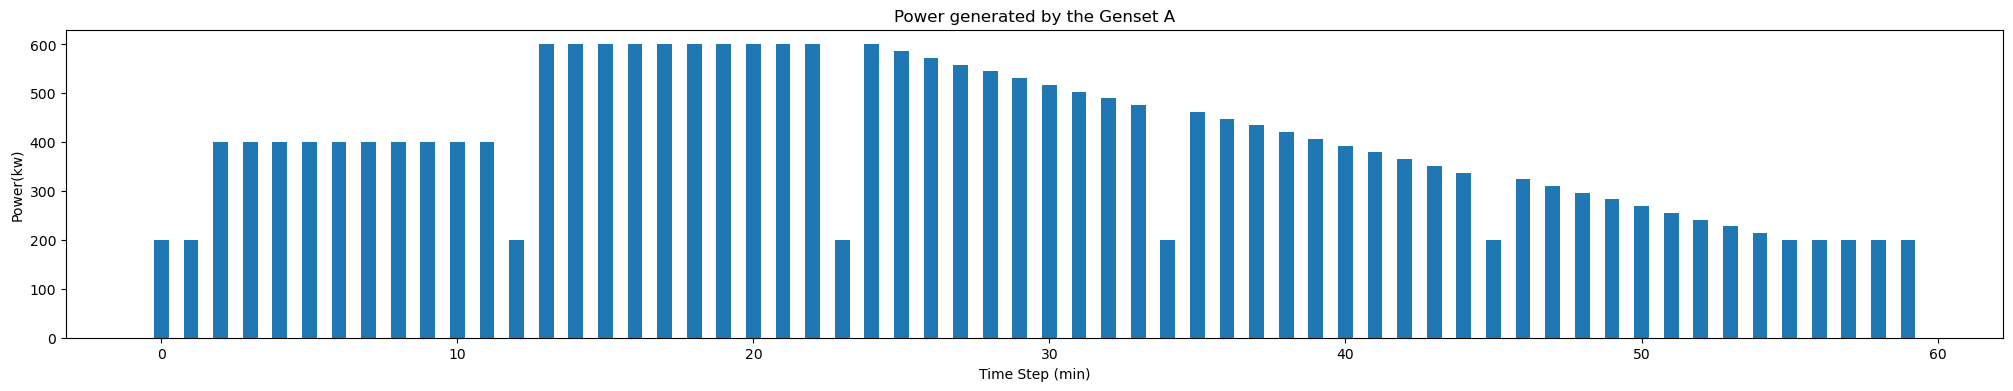

In [17]:
plt.rcParams["figure.figsize"] =  (25,4)
plt.bar(V_steps,P_A_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('Power(kw)')
plt.title('Power generated by the Genset A')
plt.show()

In [36]:
print(V_steps,P_A_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [199.99999970487437, 200.0, 400.00000057856425, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 200.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 200.0, 600.0, 586.2068965517242, 572.4137931034483, 558.6206896551724, 544.8275862068965, 531.0344827586207, 517.2413793103449, 503.44827586206895, 489.65517241379314, 475.86206896551727, 200.0, 462.0689655172414, 448.2758620689655, 434.48275862068965, 420.68965517241384, 406.8965517241379, 393.1034482758621, 379.3103448275862, 365.51724137931035, 351.72413793103453, 337.93103448275866, 200.0, 324.1379310344828, 310.3448275862069, 296.55172413793105, 282.7586206896552, 268.9655172413793, 255.1724137931035, 241.37931034482762, 227.58620689655174, 213.79310344827587, 199.99999

$\newline $
### Realised power from the genset to load.

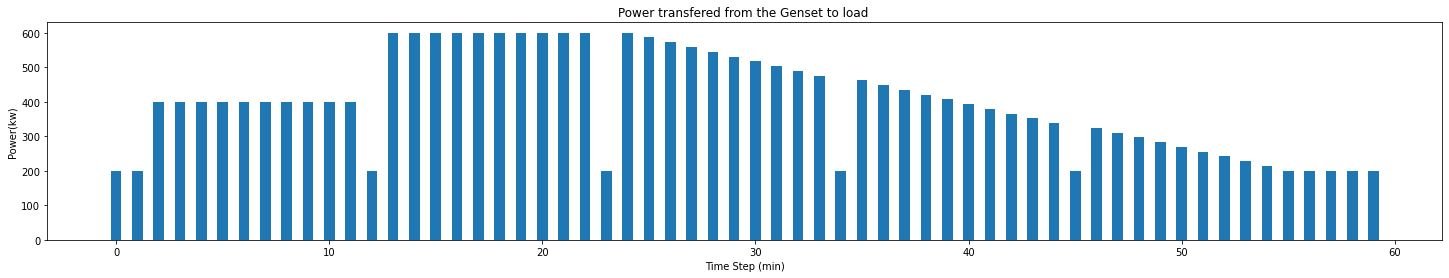

In [37]:
plt.rcParams["figure.figsize"] = (25,4)
plt.bar(V_steps,P_A_load_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('Power(kw)')
plt.title('Power transfered from the Genset to load ')
plt.show()

In [38]:
print(V_steps,P_A_load_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [200.0, 200.0, 400.00000057856425, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 200.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 200.0, 600.0, 586.2068965517242, 572.4137931034483, 558.6206896551724, 544.8275862068965, 531.0344827586207, 517.2413793103449, 503.44827586206895, 489.65517241379314, 475.86206896551727, 200.0, 462.0689655172414, 448.2758620689655, 434.48275862068965, 420.68965517241384, 406.8965517241379, 393.1034482758621, 379.3103448275862, 365.51724137931035, 351.72413793103453, 337.93103448275866, 200.0, 324.1379310344828, 310.3448275862069, 296.55172413793105, 282.7586206896552, 268.9655172413793, 255.1724137931035, 241.37931034482762, 227.58620689655174, 213.79310344827587, 200.0, 200.0, 200.0, 2

$\newline $
### Realised power to charge the battery.

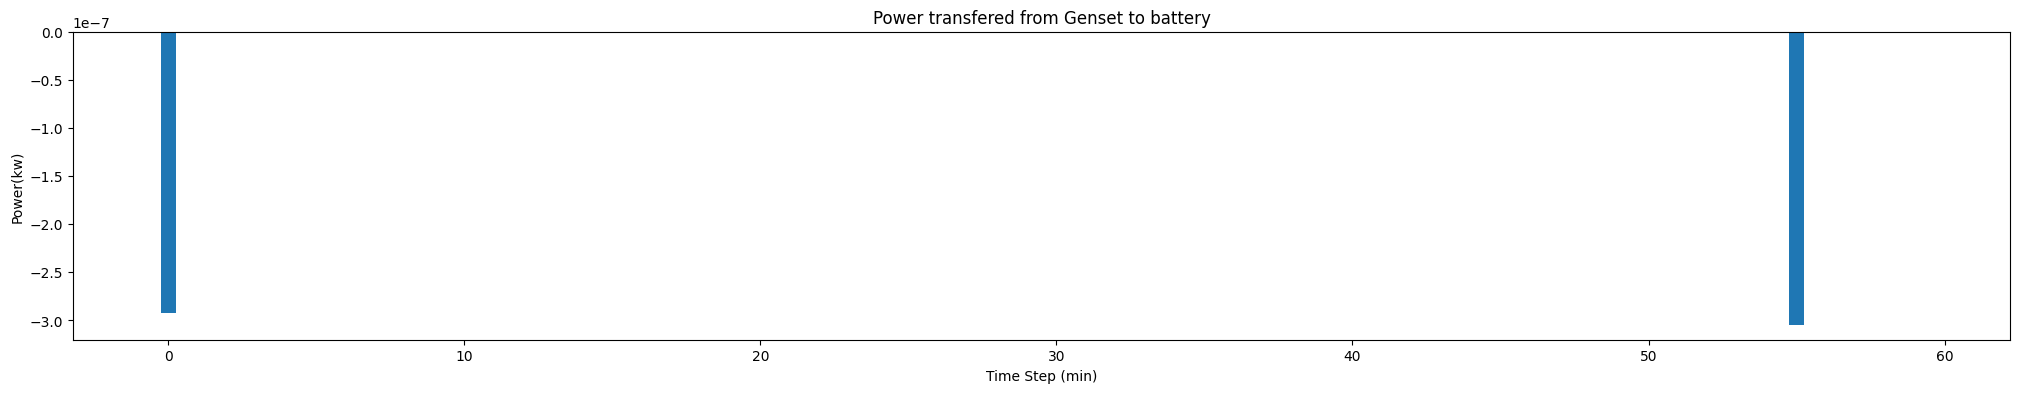

In [27]:
plt.rcParams["figure.figsize"] =  (25,4)                
plt.bar(V_steps,P_A_to_bat_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('Power(kw)')
plt.xticks()
plt.title('Power transfered from Genset to battery')
plt.show()

In [40]:
print(V_steps,P_A_to_bat_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [-2.917922972671901e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0474346456097063e-07, 0.0, 0.0, 0.0, 0.0]


$\newline $
### Realised power from the battery to load.

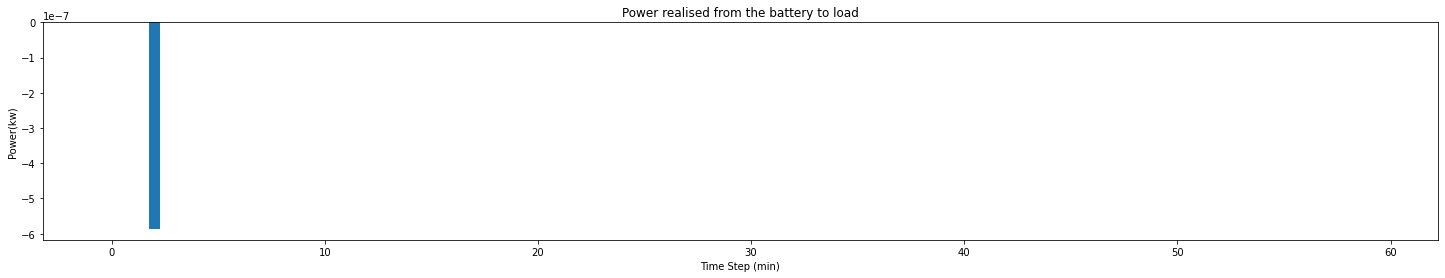

In [41]:
plt.rcParams["figure.figsize"] =  (25,4)
plt.bar(V_steps,P_From_bat_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('Power(kw)')
plt.title('Power realised from the battery to load')
plt.show()

In [42]:
print(V_steps,P_From_bat_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [0.0, 0.0, -5.878716981947582e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Battery charge balance.

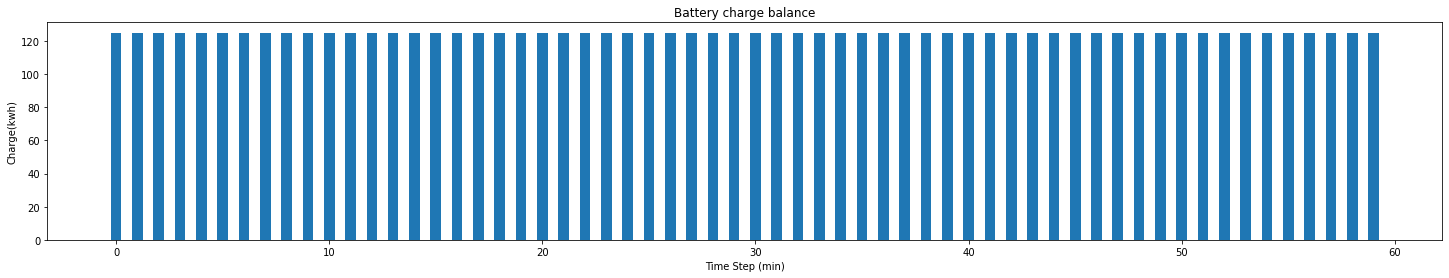

In [43]:
plt.rcParams["figure.figsize"] = (25,4)
plt.bar(V_steps,Q_bat_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('Charge(kwh)')
plt.title('Battery charge balance')
plt.show()

In [44]:
print(V_steps,Q_bat_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [124.99999971077689, 124.99999971077689, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 124.99999971077689, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 124.99999971077689, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.00000030114859, 124.99999971077689, 125.00000030114859, 125.00000030114859, 125.00000030114859, 125.0000

$\newline $
### Genset fuel consumption.

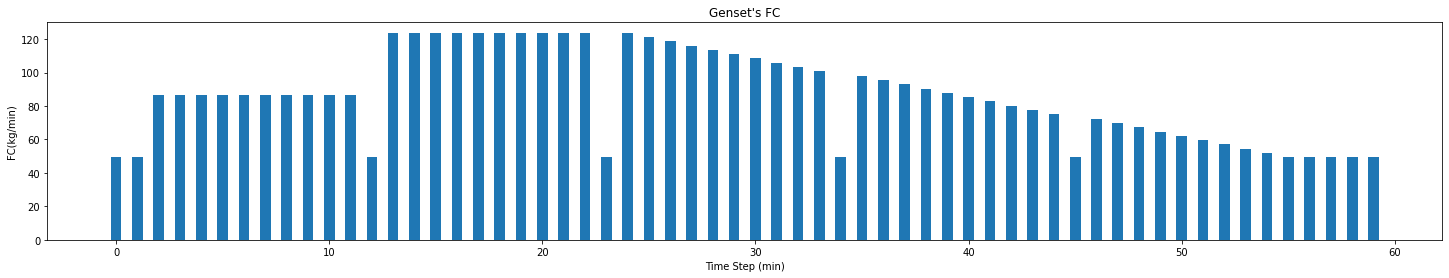

In [45]:
plt.rcParams["figure.figsize"] = (25,4)
plt.bar(V_steps,FC_A_list, width=0.5)
plt.xlabel('Time Step (min)')
plt.ylabel('FC(kg/min)')
plt.title("Genset's FC")
plt.show()

In [46]:
print(V_steps, FC_A_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] [49.31999994501809, 49.31999999999999, 86.58000010778653, 86.58, 86.58, 86.58, 86.58, 86.58, 86.58, 86.58, 86.58, 86.58, 49.31999999999999, 123.84, 123.84, 123.84, 123.84, 123.84, 123.84, 123.84, 123.84, 123.84, 123.84, 49.31999999999999, 123.84, 121.2703448275862, 118.70068965517241, 116.13103448275864, 113.5613793103448, 110.99172413793104, 108.42206896551724, 105.85241379310345, 103.28275862068965, 100.71310344827586, 49.31999999999999, 98.14344827586206, 95.57379310344827, 93.00413793103449, 90.43448275862069, 87.8648275862069, 85.2951724137931, 82.72551724137931, 80.1558620689655, 77.58620689655174, 75.01655172413794, 49.31999999999999, 72.44689655172415, 69.87724137931035, 67.30758620689654, 64.73793103448276, 62.16827586206896, 59.59862068965517, 57.02

In [47]:
print(sum(FC_A_list)*dt)

5194.799999995554


$\newline $
$\newline $
### Trip power flow bar chart.

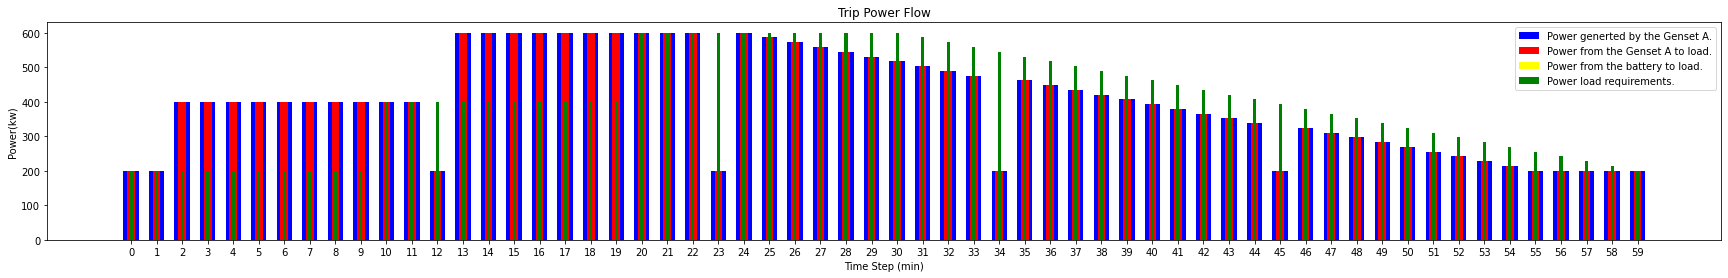

In [48]:
 
plt.rcParams["figure.figsize"] = (30,4)

gridnumber = V_steps

b1 = plt.bar(gridnumber, P_A_list, color="blue", width=0.6,
                label="Power generted by the Genset A.", align="center")

b2 = plt.bar(gridnumber, P_A_load_list, color="red", width=0.3,
                label="Power from the Genset A to load.", align="center")

b3 = plt.bar(gridnumber, P_From_bat_list, color="yellow", width=0.6,
                label="Power from the battery to load.", align="center")

b4 = plt.bar(gridnumber,d_load_list , color="green", width=0.12,
                label="Power load requirements.", align="center")

plt.title('Trip Power Flow')
plt.xlabel('Time Step (min)')
plt.ylabel('Power(kw)')
plt.xticks(gridnumber)
plt.legend(bbox_to_anchor= (1, 1))
plt.show()

